# Exploring the Graph Laplacian eigenvalues

We compute the eigenvalues and eigenvectors of the Laplacian for several simple graphs

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Evolution of the spectral properties when perturbating a path graph
We take the example of a path graph where one of the weights is modified

In [2]:
w_list = np.arange(51)/10
eigs_list = []
fiedler_list = []
for w in w_list:
    L = np.array([[w,-w,0,0,0],[-w,w+1,-1,0,0],[0,-1,2,-1,0],[0,0,-1,2,-1],[0,0,0,-1,1]])
    eigenValues,eigenVectors = np.linalg.eig(L)
    # order eigenvalues and eigenvectors by increasing value
    idx = eigenValues.argsort()  
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    # store the eigenvalues and Fiedler vector
    eigs_list.append(eigenValues)
    fiedler = eigenVectors[:,1]
    fiedler_list.append(fiedler)

## Results for eigenvalues

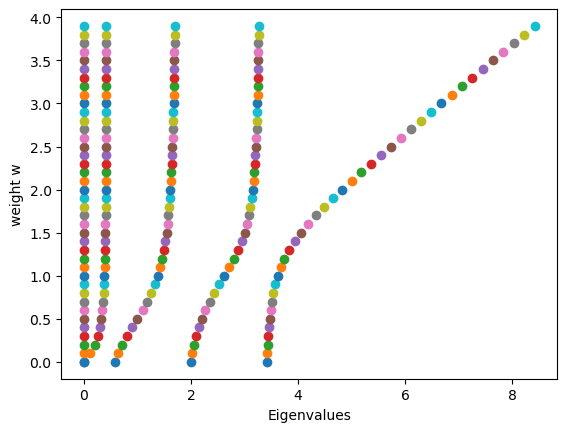

In [3]:
plt.figure()
for idx,evs in enumerate(eigs_list[:40]):
    ycoords = np.full((1,len(evs)),w_list[idx])    
    plt.scatter(evs,ycoords)
plt.xlabel('Eigenvalues')
plt.ylabel('weight w')
plt.show()

## Results for the Fiedler vector

<Figure size 640x480 with 0 Axes>

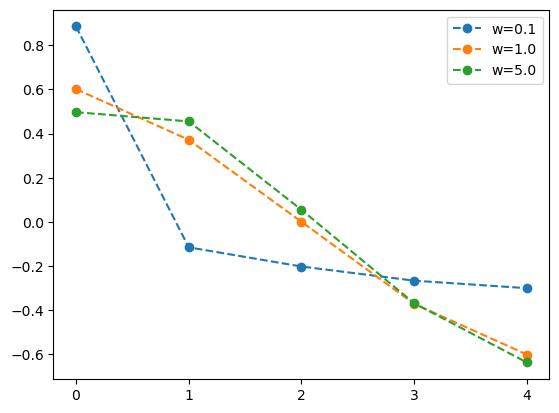

In [4]:
from matplotlib.ticker import MaxNLocator
plt.figure()
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
for idx,f in [(i,fiedler_list[i]) for i in [1,10,50] ]:
    if f[0] < 0: # eigenvectors are known up to a sign, choose the positive version
        f = -f
    plt.plot(f,'o--',label='w='+str(w_list[idx]))
plt.legend()

plt.show()

# Experiment with the Comet graph

In [5]:
# Adjacency matrix
Ac = np.array([[0,0,0,0,1,0,0,0],
              [0,0,0,0,1,0,0,0],
              [0,0,0,0,1,0,0,0],
              [0,0,0,0,1,0,0,0],
              [1,1,1,1,0,1,0,0],
              [0,0,0,0,1,0,1,0],
              [0,0,0,0,0,1,0,1],
              [0,0,0,0,0,0,1,0]])

In [6]:
# Laplacian
Lc = np.array([[1,0,0,0,-1,0,0,0],
              [0,1,0,0,-1,0,0,0],
              [0,0,1,0,-1,0,0,0],
              [0,0,0,1,-1,0,0,0],
              [-1,-1,-1,-1,5,-1,0,0],
              [0,0,0,0,-1,2,-1,0],
              [0,0,0,0,0,-1,2,-1],
              [0,0,0,0,0,0,-1,1]])

In [7]:
Gc = nx.from_numpy_array(Ac)

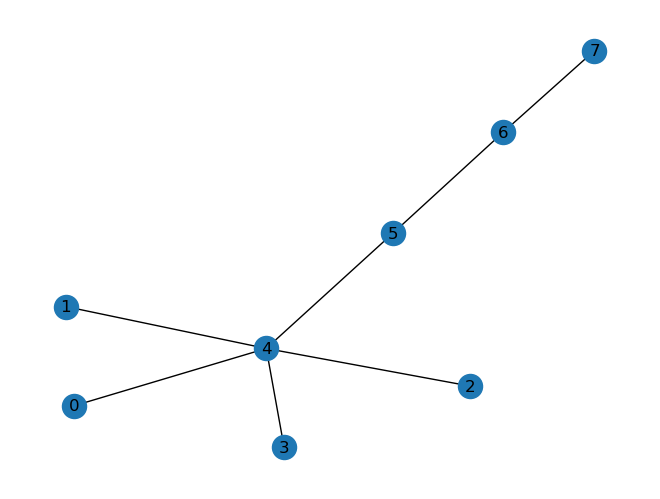

In [8]:
nx.draw(Gc, with_labels=True)

In [9]:
eigenValues,eigenVectors = np.linalg.eig(Lc)
idx = eigenValues.argsort()  
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

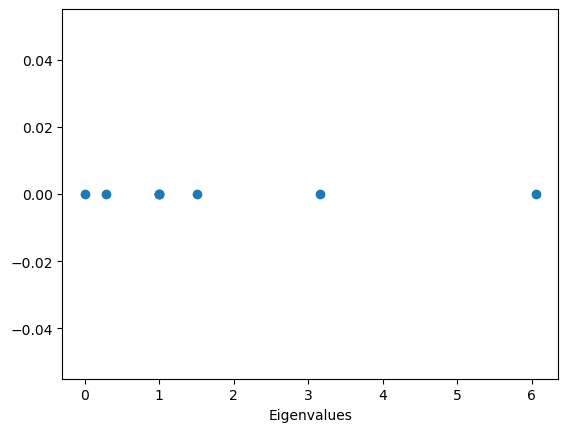

In [10]:
plt.figure()   
plt.scatter(eigenValues,np.full((1, len(eigenValues)), 0))
plt.xlabel('Eigenvalues')
plt.show()

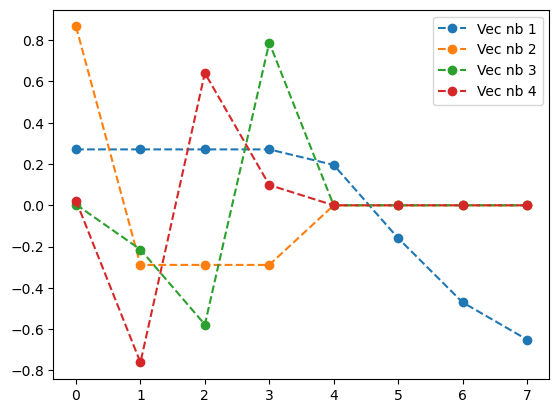

In [11]:
plt.figure()
for idx,f in [(i,eigenVectors[:,i]) for i in [1,2,3,4] ]:
    #f = f.A.flatten()
    if f[0] < 0:
        f = -f
    plt.plot(f,'o--',label='Vec nb '+str(idx))
plt.legend()    
plt.show()

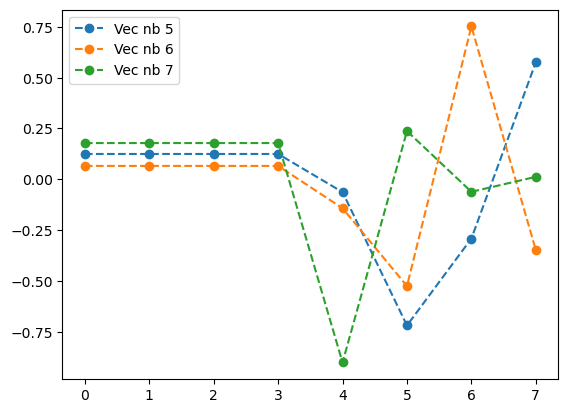

In [12]:
plt.figure()
for idx,f in [(i,eigenVectors[:,i]) for i in [5,6,7] ]:
    #f = f.A.flatten()
    if f[0] < 0:
        f = -f
    plt.plot(f,'o--',label='Vec nb '+str(idx))
plt.legend()    
plt.show()

# Experiment with a Lollipop graph

In [13]:
Gl = nx.lollipop_graph(4,2)
Ll = nx.laplacian_matrix(Gl).toarray()
eigenValues,eigenVectors = np.linalg.eig(Ll)
# sort the eigenvalues and eigenvectors
idx = eigenValues.argsort()  
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

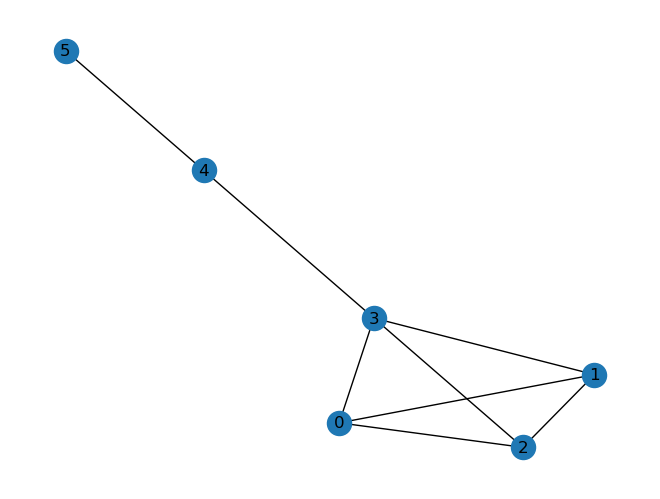

In [14]:
nx.draw(Gl, with_labels=True)

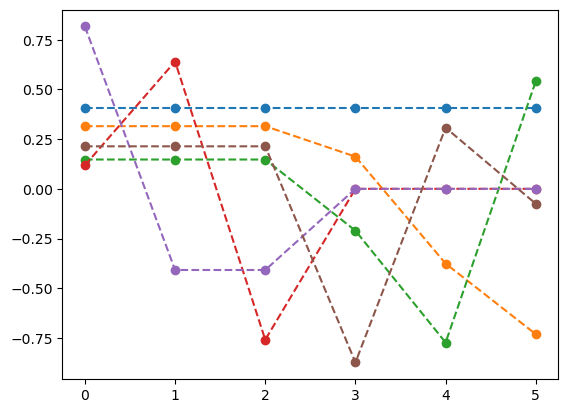

In [15]:
plt.figure()

for f in eigenVectors.T:
    f = f.flatten()
    if f[0] < 0:
        f = -f
    plt.plot(f,'o--')#,label='w='+str(w_list[idx]))
#plt.legend()    
plt.show()

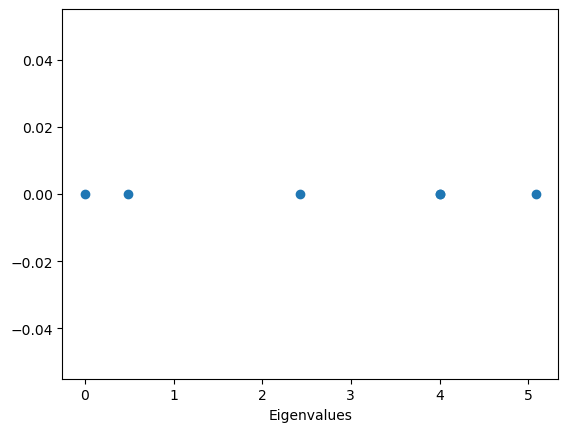

In [16]:
plt.figure()   
plt.scatter(eigenValues,np.full((1, len(eigenValues)), 0))
plt.xlabel('Eigenvalues')
plt.show()

In [17]:
eigenValues

array([8.88178420e-16, 4.85863071e-01, 2.42800673e+00, 4.00000000e+00,
       4.00000000e+00, 5.08613020e+00])